# Lab 1 Report - Image Domains

BMEN 509 - Introduction to Biomedical Imaging and Applications   
Christine Dowling (UCID 00306622)  
Due: January 30, 2024   

## Introduction

Basic image processing is an important step required before any image can be analyzed. Working with images requires a fundamental understanding of their digital representation and how this may be manipulated to obtain further information. There are a number of tools and libraries which can assist with processing and can assist users with extracting critical information. This information can also be used in the development of more advanced algorithms and decision support models.  

The purpose of this lab is to become familiar with some basic processing techniques and operations which are used in various image domains. The skills developed in this lab will serve as a foundation for future lab and project work. 

In [308]:
#Basic setup
# Library imports
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, filters
from scipy import signal, ndimage

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

In [309]:
# Constants
data_directory = os.path.join('Data', 'Lab1')
file_names = [
    'BreastUltrasound5.tif', 'T1Weighted8.jpg',
    'Thorax_PD.png', 'calcs_grids.tiff',
    'knee_ct2.tif', 'knee_xray2.tif',
    'mri_T2.tif', 'mri_brain.tif',
    'mri_pd.tif'
]

In [310]:
# Verify we can find our files
for file_name in file_names:
    name = os.path.join(data_directory, file_name)
    if not os.path.isfile(name):
        os.sys.exit('Cannot find file {}. Please make sure you have downloaded the data'.format(name))
print('Found all image files!')

Found all image files!


## Image Basics

Reading image Data\Lab1\BreastUltrasound5.tif


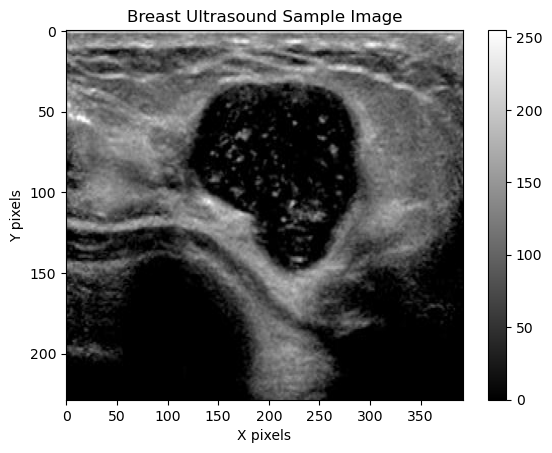

Image Data\Lab1\BreastUltrasound5.tif has:
  89768 pixels
  size (229, 392)
  data type uint8
  dimensionality 2


In [311]:
# Loading the image 'BreastUltrasound5.tif' from the relevant folder
filename = os.path.join(data_directory,'BreastUltrasound5.tif')

print('Reading image {}'.format(filename))
I_1 = io.imread(filename)

# Display the image along with a title, labeled axes and a colorbar
plt.imshow(I_1, cmap='gray', aspect = 'auto')
plt.title('Breast Ultrasound Sample Image'); plt.xlabel('X pixels'); plt.ylabel('Y pixels'); plt.colorbar() 
plt.show()

# Obtaining the picture properties (used to answer the questions below)
print('Image {} has:'.format(filename))
print('  {} pixels'.format(np.prod(I_1.shape)))
print('  size {}'.format(I_1.shape))
print('  data type {}'.format(np.dtype(I_1[0,0])))
print('  dimensionality {}'.format(len(I_1.shape)))


**Questions and Analysis**

*What is the size of the image in the X and Y dimensions?* The image above contains 392 pixels in the X direction, and 229 pixels in the Y direction.  

*How many pixels are in the image?* The image above contains (229 x 392) 89,768 pixels in total.  

*Which corner of the image is the pixel (0,0)?*: Pixel (0,0) is found in the upper left corner of the image.  

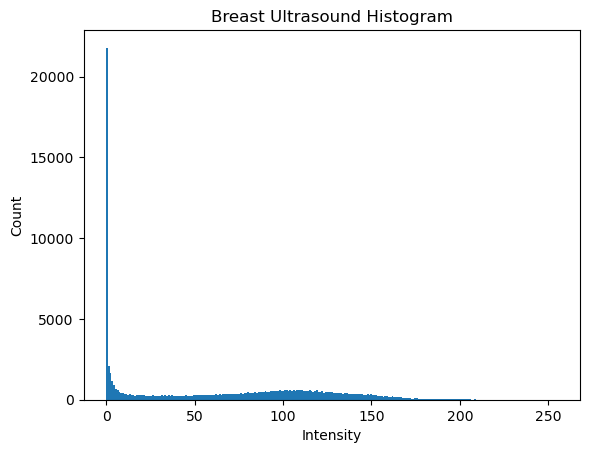

In [312]:
#plotting a histogram of the different intensities shown in the image above
plt.hist(I_1.ravel(), bins=256); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.title('Breast Ultrasound Histogram')
plt.show()

Based on the histogram above, we can see that the image contains a variety of intensities, primarily from 0 to ~175. Zero count is the highest, which corresponds to the black space seen throughout the image. There is very little white in the image, which is reflected in the histogram as there are minimal pixels with an intensity > 200.

## Transfer Functions  

Using a function that performs a window and level, load the image `mri_T2.tif` and complete the following:

| Window | Level | Tissue |
|:------:|:------:|:-------:|
| 255 | 128 | Whole dynamic range |
| 50 | 50 | High contrast between white and gray matter |
| 10 | 20 | Background |
| 50 | 100 | Tumour |


In [313]:
# First, loading the correct image
filename = os.path.join(data_directory, 'mri_T2.tif')

print('Reading image {}'.format(filename))
I_2 = io.imread(filename)

Reading image Data\Lab1\mri_T2.tif


Text(0.5, 1.0, 'Original Histogram')

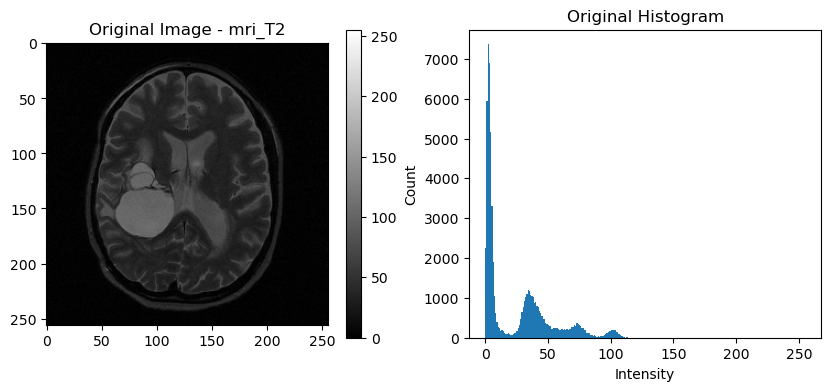

In [314]:
# Displaying the image and histogram
plt.subplots(1, 2, figsize=(10,4))
plt.subplot(1, 2, 1); plt.imshow(I_2, cmap='gray'); plt.colorbar(); plt.title('Original Image - mri_T2')
plt.subplot(1, 2, 2); plt.hist(I_2.ravel(), bins=256); plt.xlabel('Intensity');plt.ylabel('Count'); plt.title('Original Histogram')

The original image is composed of several dark grey tones. This is reflected in the histogram since we can see that the majority of the intensities exist between 0 to ~125.

C:\Users\chris\AppData\Local\Temp\ipykernel_35940\2163934273.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(size[0], size[1], 3*(count-1)+1)


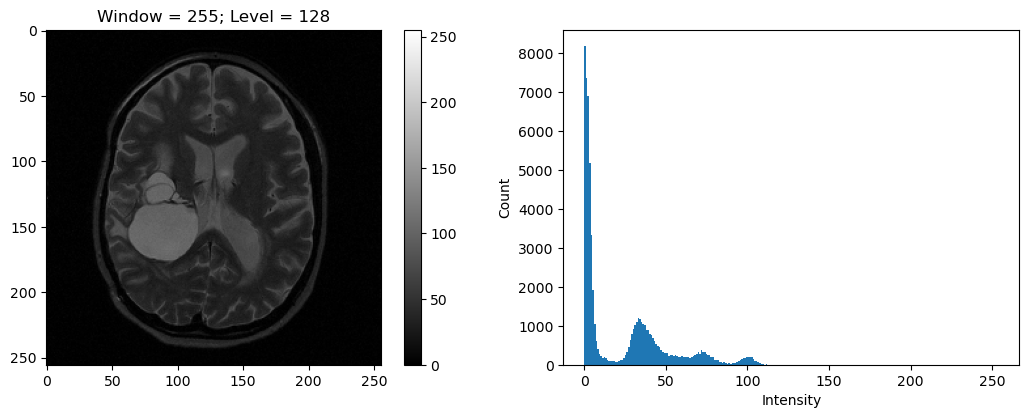

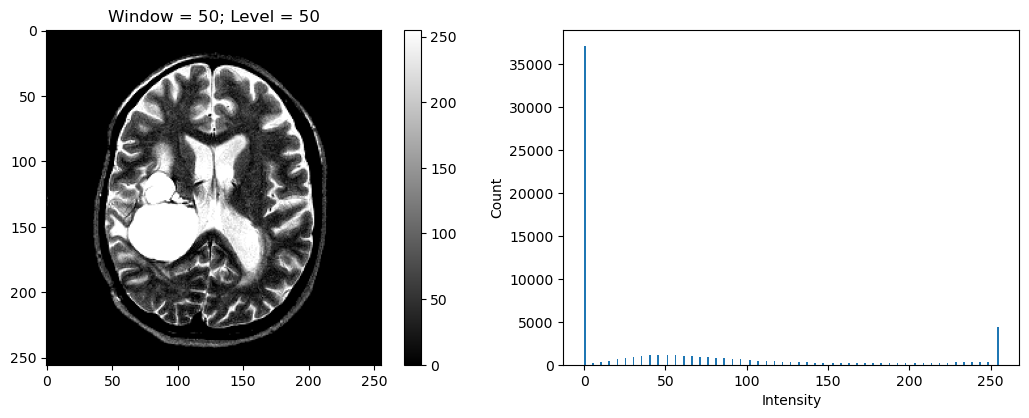

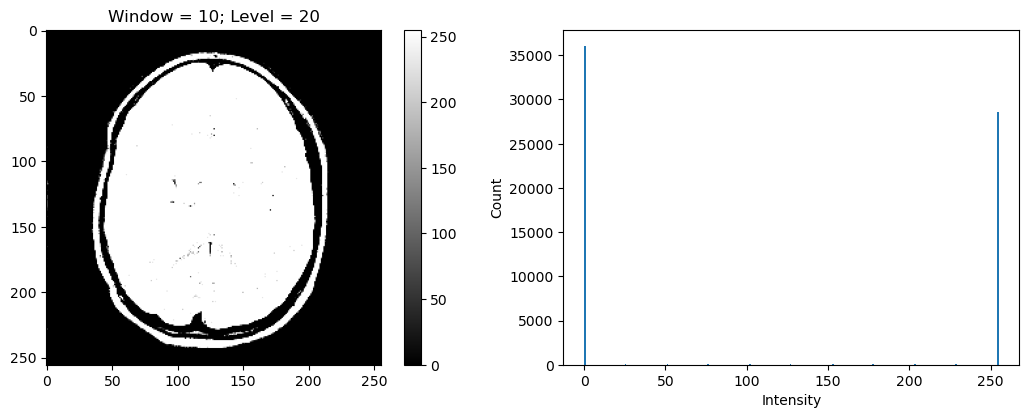

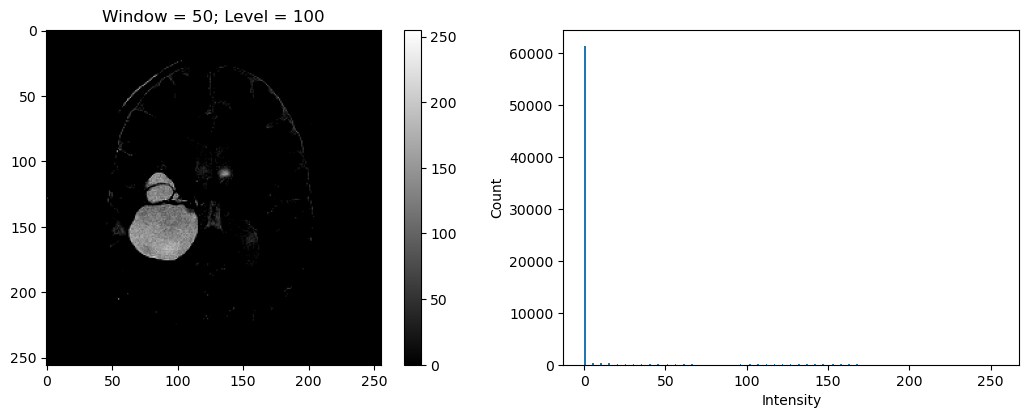

In [315]:
# Now we'll compose a function that will allow us to compare different window and level values. 
# Creating arrays with the various windows and level values (given in the table above)
W = [255, 50, 10, 50]
L = [128, 50, 20, 100]


# Defining a linear transfer function in the form y = mx + b
def lin_tf(J):
    min = np.min(J[:])
    max = np.max(J[:])
    m = (max-min)/W[i]
    b = (max)-((m)*(L[i]+(0.5*(W[i]))))
    K = (m * J) + b
    return K

# Defining a plotting function
size = (4,3)
def apply_and_plot(J, func, name, count):
    # Apply function
    min = np.min(J[:])
    max = np.max(J[:])
    K = np.clip(func(J.astype(np.float32)), 0, 255).astype(np.uint8)
    x = np.linspace(min, max, 1000)
        
    # Plot Image
    plt.subplot(size[0], size[1], 3*(count-1)+1)
    plt.imshow(K, cmap='gray', vmin=min, vmax=max)
    plt.colorbar()
    plt.title(name)

    # Plot histogram
    plt.subplot(size[0], size[1], 3*(count-1)+1+1)
    plt.hist(K.ravel(), bins=256)
    plt.ylabel('Count'); plt.xlabel('Intensity') 

#Now we will iterate over the two arrays for window and level to create the required combinations
for i in range(len(W)):
    plt.subplots(figsize=(20,20))
    apply_and_plot(I_2, lin_tf, 'Window = {}; Level = {}'.format(W[i], L[i]), 1)
    plt.show()


**Questions and Analysis**  

The histogram for the first windown and level combination appears to be identical to that of the original image. This is expected since the transformation (W = 255, L = 128) corresponds to the entire dynamic range of pixels found in the original image. In the case of the second combination (W = 50, L = 50), the intensities appear to be stretched out. This is shown in the range of intensities (which now runs from 0 - 255). It should also be noted that there are intensities which appear to be truncated (as shown by the gaps between the different count bars). These intensities correspond to the values which fall outside of the lower and upper limits of the window and level (that is, lower than `L - 0.5*W = 25` or higher than `L + 0.5*W = 75`).  

Windowing and levelling allows us to highlight different tissues by changing the amount of contrast and and brightness in a picture. As we decrease the window, the contrast increases in an image (and vice-versa). Similarly, decreasing the level increases the brightness in an image (and vice-versa). By manipulating the contrast and/or brightness, we can highlight different tissues/sets of tissues with different densities. For example, increasing the contrast in the image above will allow us to compare the white and gray matter in the brain more effectively (seen in the second transformation above). In the original image these two tissues have a similar gray tone. Increasing the contrast and brightness highlights the different densities in these tissues so we can more effectively analyze.  


## Gaussian Filter

Reading image Data\Lab1\knee_ct2.tif


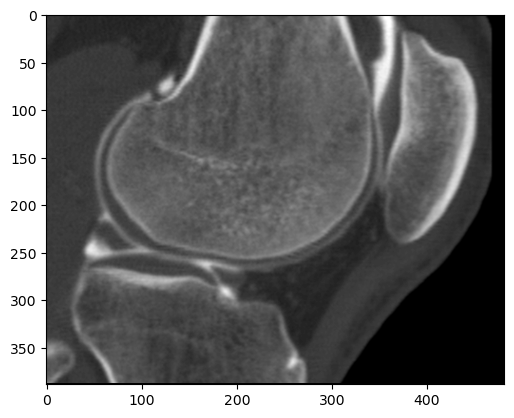

In [316]:
# Loading and displaying the original image 
filename = os.path.join(data_directory, 'knee_ct2.tif')

print('Reading image {}'.format(filename))
I_3 = io.imread(filename)

plt.imshow(I_3, cmap='gray'); plt.title('Knee CT Scan')
plt.show()


In [406]:
# Defining a Gaussian filter which accepts two parameters: kernel length (l) and sigma
def gkernel(l, sig):
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = (np.exp(-0.5 * np.square(ax) / (np.square(sig))))
    kernel = np.outer(gauss, gauss)
    return kernel/ np.sum(kernel.ravel())

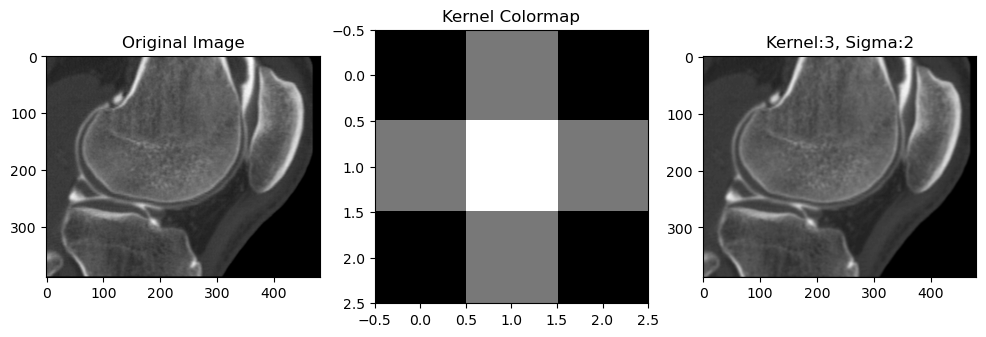

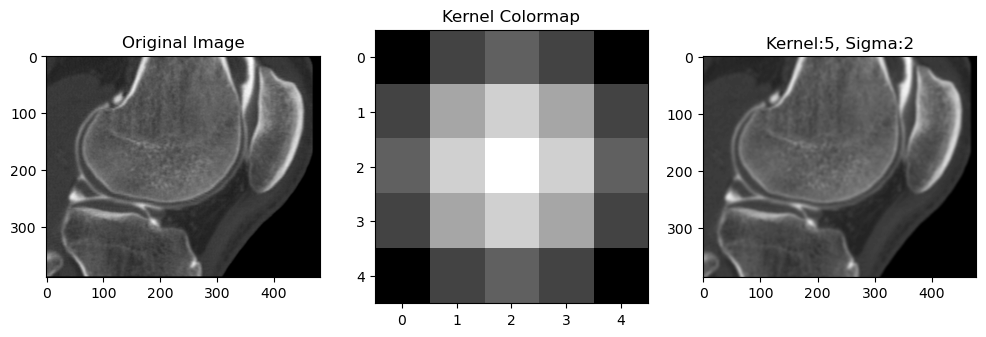

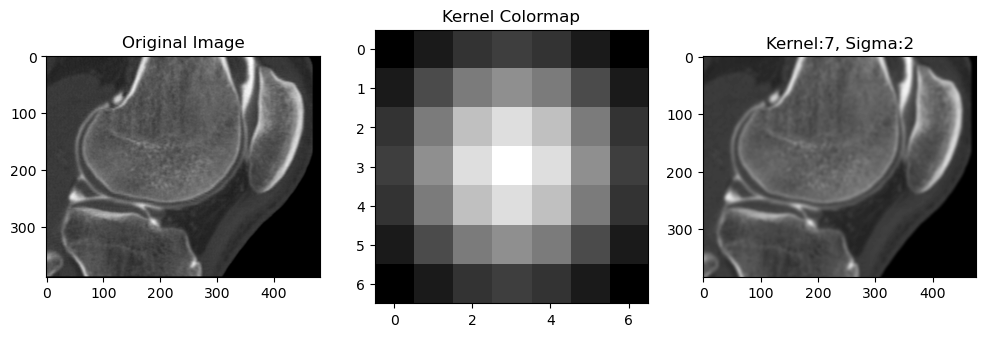

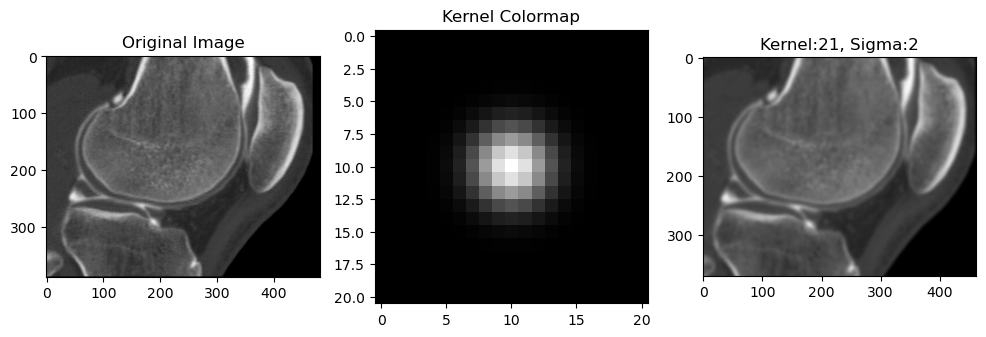

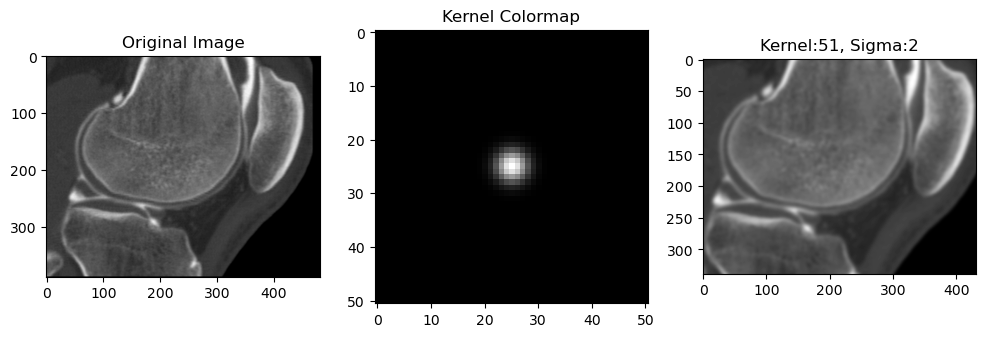

In [408]:
# Now we will apply this filter to the original image above (Knee CT Scan) and study the effects each parameter has on its implementation.
# First, holding sigma constant (sigma = 2) with varying kernel sizes
kernel_size = [3,5,7,21,51]
for i in range (len(kernel_size)):
    g_kernel = gkernel(kernel_size[i],2)
    K = signal.convolve2d(I_3, g_kernel, boundary='symm', mode='valid', fillvalue=1)
    plt.subplots(1, 3, figsize=(12,12))  
    plt.subplot(1, 3, 1); plt.imshow(I_3, cmap='gray'); plt.title('Original Image') # Repeating the original image for ease of comparison
    plt.subplot(1, 3, 2); plt.imshow(g_kernel, cmap='gray'); plt.title('Kernel Colormap') # Visualizing the kernel in a gray-scale color map
    plt.subplot(1, 3, 3); plt.imshow(K, cmap='gray'); plt.title('Kernel:{}, Sigma:{}'.format(kernel_size[i],2)) # Image after applying the Gaussian filter

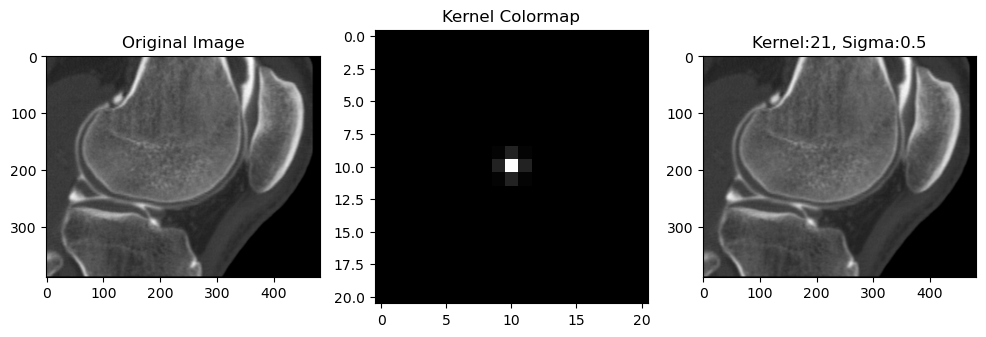

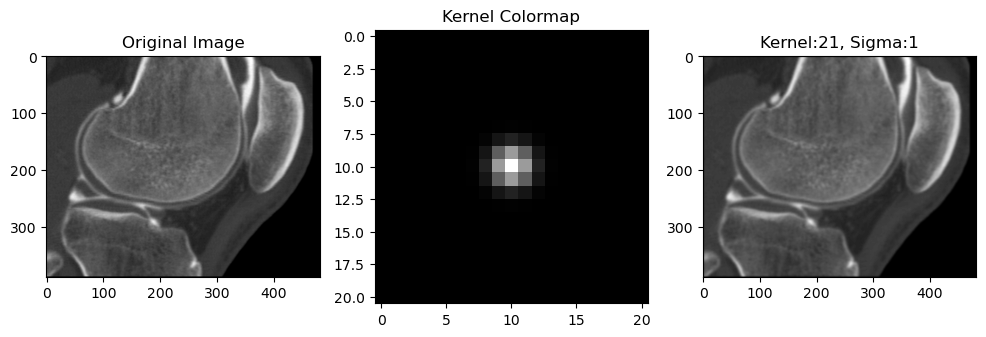

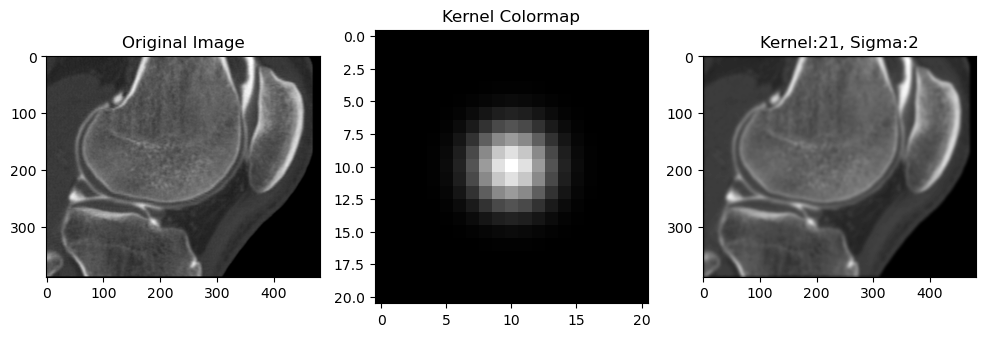

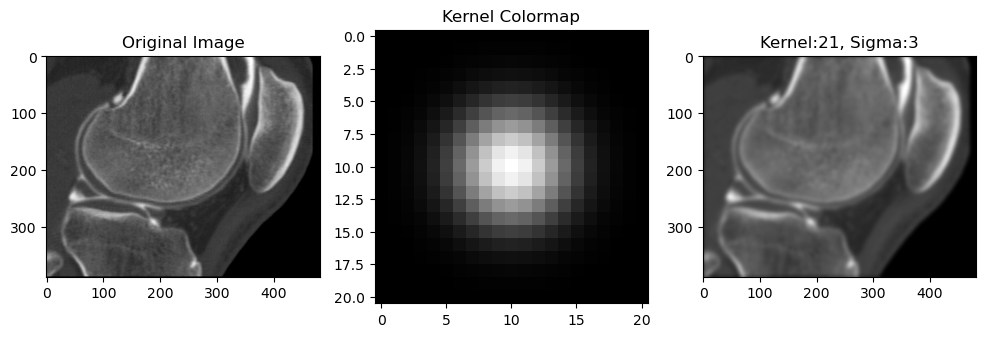

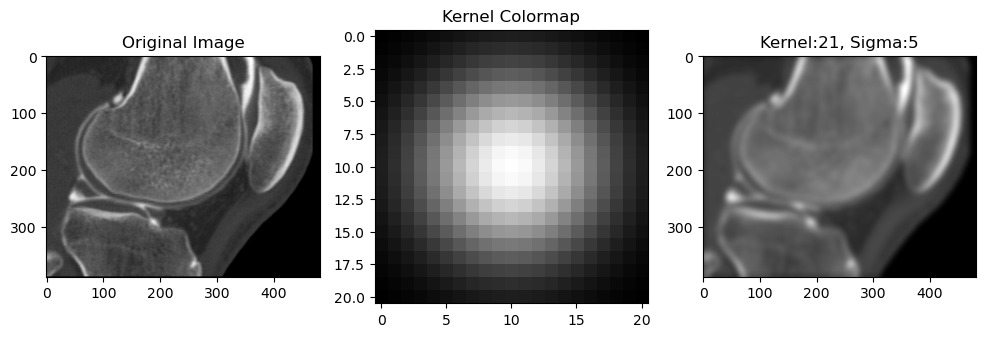

In [423]:
# Next, keeping kernel size consistent (kernel length = 21), with varying sigmas
sigma = [0.5, 1, 2, 3, 5]
for i in range (len(sigma)):
    g_kernel=gkernel(21,sigma[i])
    G = signal.convolve2d(I_3, g_kernel, boundary='symm', mode='same')
    plt.subplots(1, 3, figsize=(12,12))
    plt.subplot(1, 3, 1); plt.imshow(I_3, cmap='gray'); plt.title ('Original Image') # Original image shown for ease of comparison
    plt.subplot(1, 3, 2); plt.imshow(g_kernel, cmap='gray'); plt.title('Kernel Colormap') # Visualizing the kernel with a gray-scale colormap 
    plt.subplot(1, 3, 3); plt.imshow(G, cmap='gray'); plt.title('Kernel:{}, Sigma:{}'.format(21, sigma[i])) # Image after Gaussian filter is applied

**Questions & Analysis**

*What is the effect of increasing the kernel size but keeping sigma constant?* The kernel size (or kernel length) corresponds to the amount of the Gaussian bell curve which is taken into account by the kernel. Increasing the kernel size will reduce the resolution of the image as the size extends beyond the choosen sigma. This is shown in the first set of images above. As the kernel size increases, the resolution of the image is decreased and some of the details are lost in the filtered image.  

*What is the effect of increasing sigma but keeping the kernel size constant?* As we increase the value of sigma, we see an increased amount of blurring. Sigma is related to the amount of variation from the mean, and larger values mean that the bell curve will be wider. As shown in the second set of images above, as sigma is increased, the image appears to be more blurry.  

*Often a Gaussian filter is used to filter noise in an image. How should the parameters (sigma,kernel size) be chosen for filtering noise?* The kernel size and sigma are key components of the shape and size of the normal distribution applied in the Gaussian filter. Ideally, the values of the filter should be near zero around the edges of the mask in order to use the entirety of the bell curve. This means that the value of the kernel should be sufficiently large depending on the size of sigma. As a rule of thumb, kernel length at least three times sigma would guarantee that a majority of the bell curve is being applied. Of course, the choice of sigma will be dependent on the nature of the image itself. Depending on the amount of contrast and resolution of the unfiltered image, as well as the type of noise, will dictate an appropriate value of sigma that can selected.     

*What is the disadvantage of making the kernel extremely large?* The disadvantage of having a disproportionately large kernel is that the majority of the values in the kernel will be close to zero. Looking at the examples above where we have a kernel of 21 or 51 and a sigma below 3, the majority of the kernel (according to the gray-scale colormap) is black. Practically speaking this means that during convolution, the majority of the values (pixels) in the image will be multiplied by zero, which may reduce the resolution of the filtered image. 

## Understanding Signal Noise and Contrast

Reading image Data\Lab1\mri_pd.tif


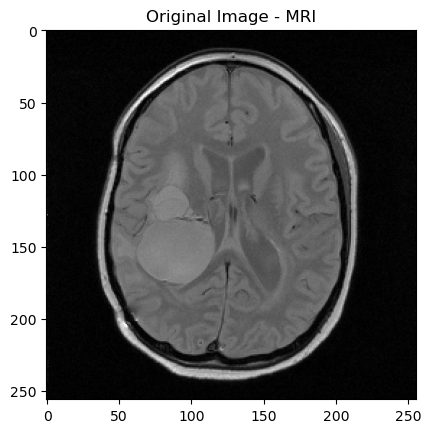

In [409]:
#Loading and displaying the original image
filename = os.path.join(data_directory, 'mri_pd.tif')

print('Reading image {}'.format(filename))
I_4 = io.imread(filename)
plt.imshow(I_4, cmap='gray'); plt.title('Original Image - MRI')
plt.show()

Text(0.5, 1.0, 'Salt & Pepper Noise')

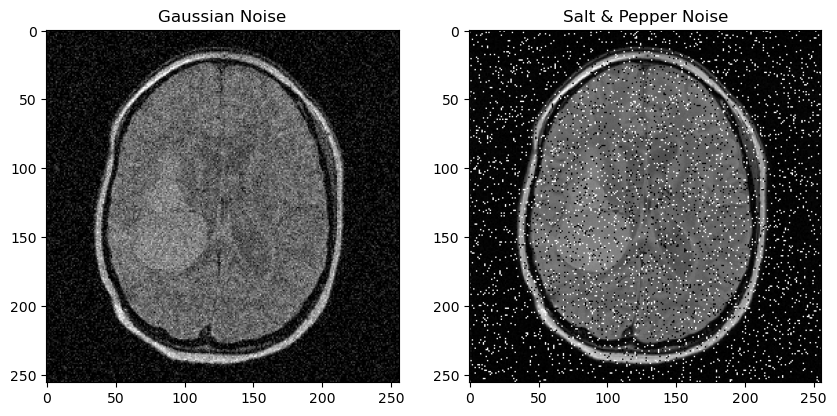

In [321]:
# In order to create the noisy images I will be using the random_noise library from skimage 
from skimage.util import random_noise

# Applying Gaussian noise to the image with a mean = 0 and variance = 0.01
gauss_noise = random_noise(I_4, mode='gaussian', mean = 0, var = 0.01)
# Applying salt and pepper noise to the image with a noise density of 0.1
sp_noise = random_noise(I_4, mode='s&p', amount = 0.1)

# Plotting these images next to each other so they can be easily compared. 
plt.subplots(1, 2, figsize=(10,10))
plt.subplot(1,2,1); plt.imshow(gauss_noise, cmap='gray'); plt.title('Gaussian Noise')
plt.subplot(1,2,2); plt.imshow(sp_noise, cmap = 'gray'); plt.title('Salt & Pepper Noise')

Text(0.5, 1.0, 'Salt & Pepper Noise with Gaussian Filter')

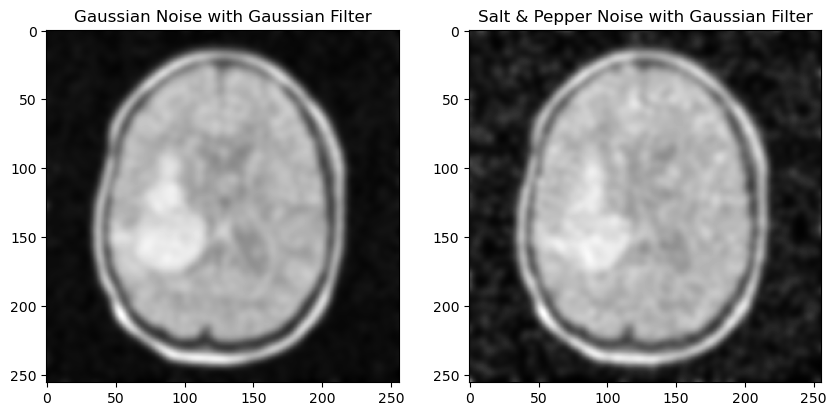

In [322]:
# For the filters I will be using the filters library from skimage which contains both a Gaussian and median filter
#Filtering the noisy images with a Guassian Filter with sigma = 3
gauss_noise_gfilt = skimage.filters.gaussian(gauss_noise, sigma=3)
sp_noise_gfilt = skimage.filters.gaussian(sp_noise, sigma = 3)

plt.subplots(1, 2, figsize=(10,10))
plt.subplot(1,2,1); plt.imshow(gauss_noise_gfilt, cmap='gray'); plt.title('Gaussian Noise with Gaussian Filter')
plt.subplot(1,2,2); plt.imshow(sp_noise_gfilt, cmap = 'gray'); plt.title('Salt & Pepper Noise with Gaussian Filter')


Text(0.5, 1.0, 'Salt & Pepper Noise with Median Filter')

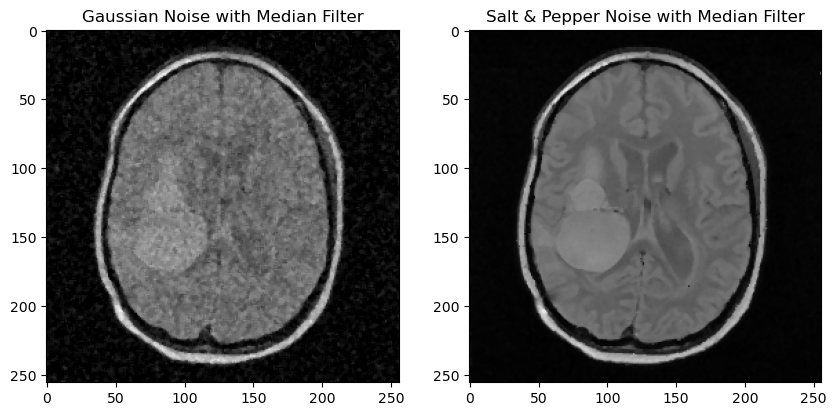

In [323]:
#Filtering the noisy images with a median filter
gauss_noise_mfilt = skimage.filters.median(gauss_noise)
sp_noise_mfilt = skimage.filters.median(sp_noise)

plt.subplots(1, 2, figsize=(10,10))
plt.subplot(1,2,1); plt.imshow(gauss_noise_mfilt, cmap='gray'); plt.title('Gaussian Noise with Median Filter')
plt.subplot(1,2,2); plt.imshow(sp_noise_mfilt, cmap = 'gray'); plt.title('Salt & Pepper Noise with Median Filter')


In [420]:
# Defining a function that takes an image and the reference to two points and calculates the two different noise metrics (SNR and CNR)
def n_metrics(J, A_x, A_y, B_x, B_y, name): # A_x and A_y refer to the x and y coordinates of point_A (and likewise for point_B)
    # In order to give these two points to the function, the x and y coordinates need to be reversed as they correspond to the columns and rows of the image array, respectively.
    point_A = (A_y, A_x)     
    point_B = (B_y, B_x)
    N = np.prod(J.shape)
    mean = np.mean(J)
    std = np.sqrt((N / (N-1)) * (np.std(J)**2)) # calculating the unbiased standard deviation 
    diff = (J[point_A]) - (J[point_B])
    contrast = np.abs(diff)
    SNR = float("{:.2f}".format(mean/std))
    CNR = float("{:.2f}".format(contrast/std))
        
    #plotting the results
    plt.imshow(J, cmap='gray')
    plt.plot(A_x, A_y, "og", markersize= 10) #labelling point_A with a green circle
    plt.plot(B_x, B_y, "or", markersize = 10) #labelling point_B with a red circle
    plt.title('{} \n SNR = {}, CNR = {}'.format(name, SNR, CNR)) #recording the SNR and CNR at the top of the graph for easy comparison between images
    plt.show()

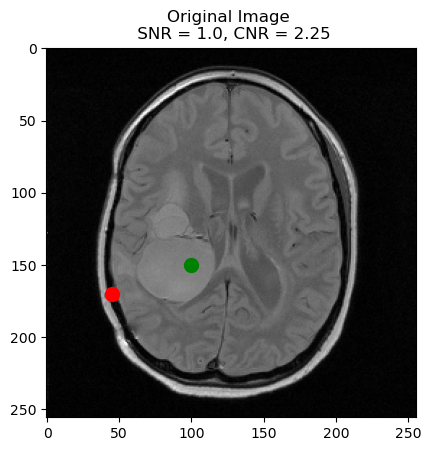

In [421]:
# plotting the original figure with markers (A = green; B = red) along with SNR and CNR calculations.
n_metrics(I_4, 100, 150, 45, 170,'Original Image')

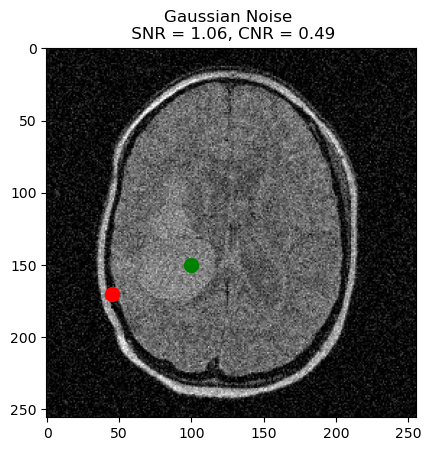

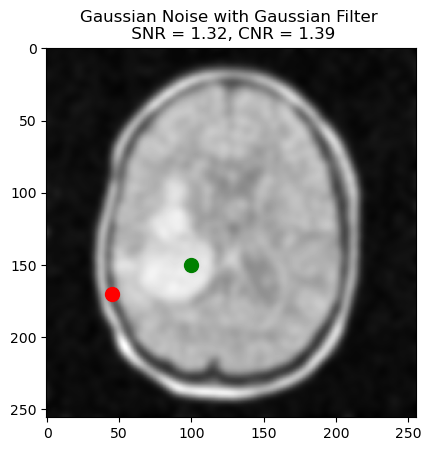

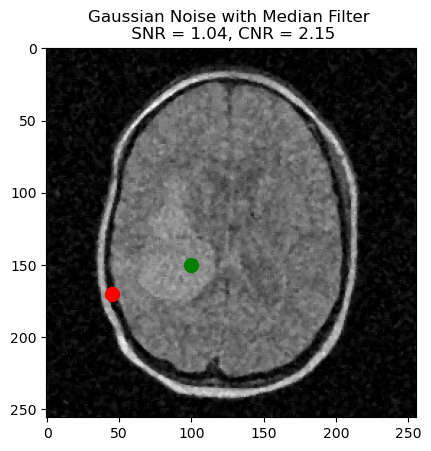

In [417]:
#plotting the image with Guassian Noise, before and after the Gaussian and median filters
n_metrics(gauss_noise, 100, 150, 45, 170, 'Gaussian Noise')
n_metrics(gauss_noise_gfilt, 100, 150, 45, 170, 'Gaussian Noise with Gaussian Filter')
n_metrics(gauss_noise_mfilt, 100, 150, 45, 170, 'Gaussian Noise with Median Filter')

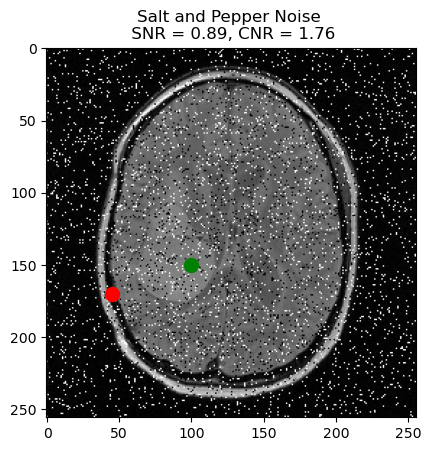

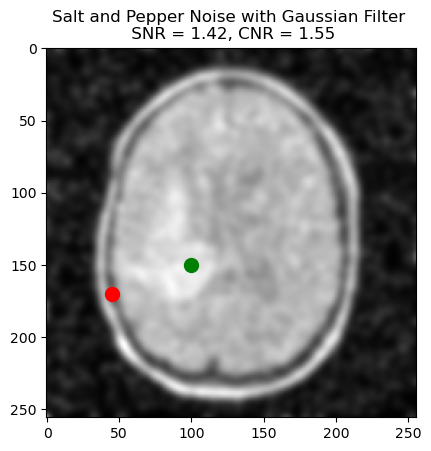

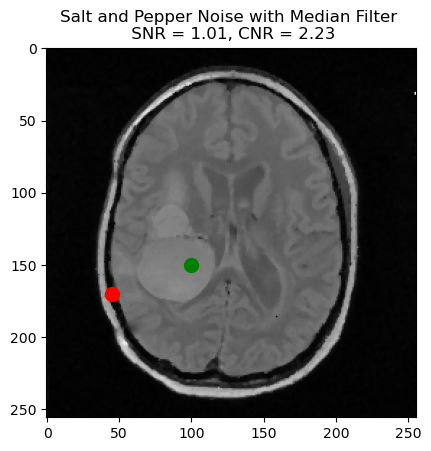

In [422]:
#plotting the Image with Salt & Pepper Noise, before and after Gaussian and median filters
n_metrics(sp_noise, 100, 150, 45, 170, 'Salt and Pepper Noise')
n_metrics(sp_noise_gfilt, 100, 150, 45, 170, 'Salt and Pepper Noise with Gaussian Filter')
n_metrics(sp_noise_mfilt, 100, 150, 45, 170, 'Salt and Pepper Noise with Median Filter')


**Questions and Analysis**  

*Qualitatively compare the original image to the Gaussian and salt and pepper noise images. What is the difference between Gaussian noise and salt and pepper noise?* Both noisy images appear to have some distortion compared to the original image. In the case of Guassian noise, the noise is normally distributed. This appears as a more evenly distributed noise (which shows up as speckles with a range of gray-scale values) throughout the image. This noise has a slight impact on the SNR (1.06) and a more serious effect on the CNR (0.49). On the other hand, salt and pepper noise has a higher contrast than Gaussian since the noise either has a value of 0 or 255 (corresponding to the black and white pixels scattered throughout). Additionally, the white and black (salt and pepper) pixels are randomly distributed throughout the image. This has a moderate effect on the SNR (0.89) and less of an effect on the CNR (1.76) (compared to the Gaussian noise).   
 
*Compare the median and Gaussian filtered salt and pepper noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?* In the case of the salt and pepper noise images, the median filter produced the best CNR (2.23 compared to 1.76) however, the Gaussian filter produced a better SNR (1.42 to 1.01). From the perspective of a radiologist, the median filtered image appears to be a qualititively better image despite having a lower SNR since the resolution appears to be much closer to the original image. The median filter appears to be much more effective at removing salt and pepper noise (due to its operation). In addition, despite the lower SNR, the values for SNR and CNR obtained from the median filtered image are much closer to the values in the original image (SNR = 1.0, CNR = 2.32).

*Compare the median and Gaussian filtered Gaussian noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?* For the Gaussian noise images, again the median filtered image has a higher CNR (2.15 compared to 1.39), however, the Gaussian filtered image has a higher SNR (1.32 compared to 1.04). From the perspective of a radiologist, the qualitatively better image is again the median filtered image. Similar to above, the SNR and CNR from the median filtered image are closer to the values obtained in the orginal image. In addition, the Gaussian filtered image is almost unusable since most of the resolution and contrast has been lost (but both filtered images are less than optimal).      

*Does the best qualitative result always agree with the best numerical result? Why is it wise to visualize your images and not just rely on metrics?* As shown in the examples above, SNR and CNR can be misleading, especially if considered on their own. In the case of the salt and pepper noise, this was evident when comparing the SNR values. Further, depending on the type of noise and filtering applied, the resulting images may not be useable for their intended purpose. For example, in the case of the Gaussian noise, despite the median filtered image being qualitatively better, the image is still not optimal. Due to the operation of the median filter, much of the resolution has been lost in the white/grey matter and the resulting image is quite poor. In addition to looking at the metrics, the original image should be reviewed/analyzed to see if the filter will help (or hinder analysis). Lastly, the purpose of the analysis should be kept in mind when applying these operations.  

## Conclusion

This lab provided a basic introduction to the programming tools that will be required in image processing. From analyzing histograms and noise metrics I was able to gain a better understanding of how images are organized and accessed. Further, I was able to manipulate images through the application of noise and filters. These tools will provide a good foundation for future project work where I can explore some of these topics in further detail. 